# Demand Forecast of Vital Products for COVID-19 Lockdown
## by using Freight Shipment Data
from:
[1] https://www.census.gov/data/datasets/2012/econ/cfs/2012-pums-files.html

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from statistics import stdev 
import pandas as pd
import math

In [34]:
df = pd.read_csv('cfs_2012_pumf_csv.txt')

By using the "Appendix A- Data Dictionary" downloaded from https://www.census.gov/data/datasets/2012/econ/cfs/2012-pums-files.html , let's explore the product that is demanded the most in a certain city.

In [5]:
#container freight station that are origin
len(df['ORIG_CFS_AREA'].unique())

169

In [6]:
#container freight station that are destination
len(df['DEST_CFS_AREA'].unique())


132

In [11]:
destination = df['DEST_CFS_AREA'].unique()

In [91]:
product = df['SCTG'].unique()
len(product)

52

### Histogram of Destinations vs Total Product Demands

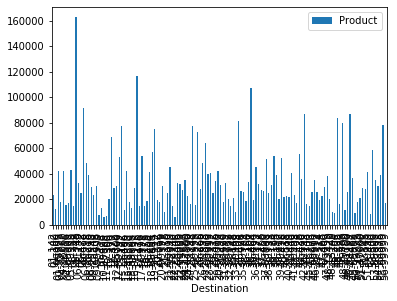

In [35]:
frame = pd.DataFrame({'Destination': df['DEST_CFS_AREA'],'Product': df['SCTG']})
frame
frame.groupby(['Destination']).count().plot(kind='bar')



### Finding which location has the biggest total product demand

In [48]:
data=frame.groupby(['Destination']).count()
data[data['Product']==data['Product'].max()]

,Product
Destination,
06-348,162548


According to the result above and the histogram, Destination 06-348 demands the most total number of products. Destination 06-348 refers to the Los Angeles-Long Beach, CA CFS Area. This location is a hot spot to explore since the flow of the products to the location is important.


### The Most Demanded Product in Los Angeles-Long Beach, CA CFS Area

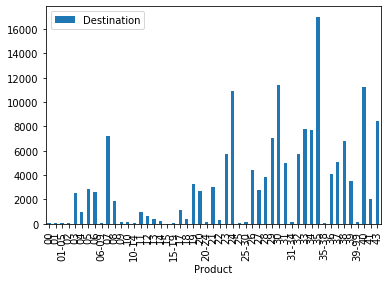

In [72]:
data2=df[df['DEST_CFS_AREA']=="06-348"]

frame3= pd.DataFrame({'Destination': data2['DEST_CFS_AREA'],'Product': data2['SCTG']})
frame3.groupby(['Product']).count().plot(kind='bar')



As can be seen from the histogram above, the most demanded product in Los Angeles-Long Beach, CA CFS Area is product 35 which is the Electronic and Other Electrical Equipment and Components, and Office Equipment.


### Analysis of The Most Demanded Product In a Certain State

Below we calculate the product that appeared most for a destination.
However to determine the demand we need to consider the weights
of the shipments of each product for a certain destination. After asuming 
a weight per each specific product type, we can find the demand 
amount for a product for a certain destination by dividing the total number of weight
to the unit weight that we assumed. For this stage of the project calculations we will consider,
the number of times that the product shipment appeared for a certain state in order
to find the product that has the highest demand. 

In [99]:
# list for tracking the max demand value for most demanded product
list1 = []
# list for tracking the destination of the most demanded product
list2 = []
# list for tracking the which product is the most demanded
list3 = []


"""This code determines the product i that is demanded the most 
in destination bin 2012 data in order to use it for forecast"""

#i for number each unique destination and b for product
for i in range (132):
    max_find=0
    for b in range (52):
        c = destination[i]
        d = product[b]
        dest_rows = df[df['DEST_CFS_AREA'] == c]
        dest_n_product_rows = dest_rows[dest_rows['SCTG'] == d]
        product_demand_sum = len(dest_n_product_rows.SCTG)
        if max_find<product_demand_sum:
            max_find = product_demand_sum
            e = c
            n = d
        
    list1.append(max_find)
    list2.append(e)
    list3.append(n)
max(list1)

17005

In [ ]:
df.plot(x='DEST_CFS_AREA', y='SCTG')

In [100]:
list1.index(17005)

46

In [101]:
list3[46]  #the most demanded product

'35'

In [102]:
list2[46]  #the destination of the most demanded product

'06-348'

From the "Appendix A- Data Dictionary", '35' refers to the Electronic and Other Electrical Equipment and Components, and Office Equipment as a product. Also, '06-348' refers to the destination Los Angeles-Long Beach, CA  CFS Area from the Appendix. 

After exploring the most demanded product in a certain city, let's explore the demands for critical products during Corona outbreak such as pharmaceutical products and food products in order to prevent a possible shortage of these vital products.

### Product Demands To Explore

SCTG Codes of Products: 
 
- 01 - Animals and Fish (live)
- 02 - Cereal Grains (includes seed)
- 04 - Animal Feed, Eggs, Honey, and Other Products of Animal Origin
- 05 - Meat, Poultry, Fish, Seafood, and Their Preparations
- 06 - Milled Grain Products and Preparations, and Bakery Products


- 21 - Pharmaceutical Products



Let's first explore the demand for pharmaceutical products and find where the demand is the highest.

In [87]:
len(df[df['SCTG'] == '21'])

85890

In [109]:
#in order to find the destination that the pharmaceutical products demanded the most
#and finding what this demand is

list_product = []

for i in range (132):

    c = destination[i]
    dest_rows = df[df['DEST_CFS_AREA'] == c]
    dest_n_product_rows = dest_rows[dest_rows['SCTG'] == '21']
    product_demand_sum = len(dest_n_product_rows.SCTG)

    list_product.append(product_demand_sum)

max_prod_demand = max(list_product)
dest_index_max_demand=list_product.index(max_prod_demand)
dest_index_max_demand

46

In [111]:
#the demand of the location that demands pharmaceuticals the most
max_prod_demand

2981

In [110]:
#most demanded destination for pharmaceuticals
destination[dest_index_max_demand]

'06-348'

We can observe the similar type of findings for the rest of the vital products in the further steps of the project.
Now let's try to incorporate the demand forecasting in in order to plot the forecast for different leadtimes in supply chain. Such plots will be obtained by including the demand amounts for a certain product from the data set and its forecast will be comnducted by the code below. For now this code implements the forecast and generate plots according to random initial order values for retailer.

In [138]:

INIT_INV = 0
ITEM_REC = 1
ITEM_ON_HAND = 2
ORD_REC = 3 #ORDER RECEIVED
ITEM_OWED = 4
ITEM_SENT = 5
FIN_INV = 6
ITEM_ORD = 7
INV_POS = 8
FORECAST = 9

L=0 #LEADTIME

order = np.zeros((1, 9))
order = [10, 9, 12, 8, 11, 9, 12, 8, 11]  #starting with random orders since we are going to disregard at least first 1000 rows

class  Simulation:
    def __init__(self, total_time_steps, entities, method):
        self.current_time_step = 0
        self.entities = entities
        self.total_time_steps = total_time_steps
        self.method = method

    def run_simulation(self):
        for i in range(self.total_time_steps):
            self.advance_time_step()
            
    def advance_time_step(self):
#         print("time step: "+ str(self.current_time_step))
    
        for entity_object in self.entities:
            #call all columns
            entity_object.initInv(self.current_time_step)
            entity_object.orderRec(self.current_time_step)
            entity_object.forecast(self.current_time_step, self.method)
            
            entity_object.itemRec(self.current_time_step)
            entity_object.itemOnHand(self.current_time_step)
            
            entity_object.itemsOwed(self.current_time_step)
            
            entity_object.itemRecManuf(self.current_time_step)   
            entity_object.itemSent(self.current_time_step)
            
            entity_object.finalInv(self.current_time_step)
            entity_object.invPos(self.current_time_step)
   
            entity_object.itemOrder(self.current_time_step, self.method)
            
        self.current_time_step += 1

class Entity:
    def __init__(self, name, customer, initial_inventory, lead_time):
        self.name = name
        self.table = np.zeros((4000,10))
        self.customer = customer
        self.initial_inventory = initial_inventory    
        self.lead_time = lead_time
 

    def initInv(self, time_step):
        if(time_step == 0):
            self.table[0][INIT_INV] = self.initial_inventory
        else:
            self.table[time_step, INIT_INV] = self.table[time_step-1, FIN_INV]
            
    def orderRec(self,time_step):  #items ordered = my forecast and orderRec = customer's forecast
        if(time_step > 0):
            if(self.name == "retailer"):
                self.table[time_step,ORD_REC] = order[(time_step-1) % len(order)]
            else:
                self.table[time_step,ORD_REC] = self.customer.table[time_step-1,ITEM_ORD]
        
        
    def forecast(self, time_step, method): #do this from period 1
        if(time_step == 0):
            self.table[1, FORECAST] = 10 #forecast at time zero
        else:
            #self.table[time_step+1, FORECAST] = np.round(self.table[time_step, FORECAST]*(1-alpha)+ alpha* self.table[time_step, ORD_REC], 0)
            self.table[time_step+1, FORECAST] = self.table[time_step, FORECAST]*(1-alpha)+ alpha* self.table[time_step, ORD_REC]
    
    def itemRec(self, time_step):
        if(time_step > 0):
            if (self.lead_time>0 and time_step <= self.lead_time):
                self.table[time_step,ITEM_REC]=10
                
            
    def itemOnHand(self, time_step):  #items on hand= initial inventory + items received
        self.table[time_step,ITEM_ON_HAND] = max(self.table[time_step,INIT_INV], 0)+ self.table[time_step,ITEM_REC]
        
    def itemsOwed(self, time_step):
        self.table[time_step,ITEM_OWED] = max(self.table[time_step,ORD_REC], self.table[time_step,ORD_REC] - self.table[time_step,INIT_INV])

            
    def itemSent(self, time_step):
        quantity_to_send = min(self.table[time_step][ITEM_ON_HAND],self.table[time_step][ITEM_OWED])
        self.table[time_step][ITEM_SENT] = quantity_to_send
        if(self.name != "retailer"):
            self.customer.table[time_step+self.lead_time][ITEM_REC] = quantity_to_send
            
        
    def itemRecManuf(self, time_step):
        if(self.name == "manufacturer"):
           self.table[time_step][ITEM_REC] = self.table[max(0,time_step-self.lead_time-1)][ITEM_ORD]
    
    def finalInv(self, time_step):     # = initial+ items rec-item sent
   
        self.table[time_step,FIN_INV] = self.table[time_step][ITEM_ON_HAND]- self.table[time_step,ORD_REC] #self.table[time_step,ITEM_SENT]

        
    def invPos(self, time_step):
        if(time_step == 0):
            self.table[0][INV_POS] = 10+self.lead_time*10
        else:
            itemExp =sum(self.table[max(0,time_step-self.lead_time):time_step+1,ITEM_ORD])
            self.table[time_step,INV_POS] = self.table[time_step,FIN_INV]  + itemExp
        
    def itemOrder(self, time_step, method):
        if(method == "ES1"):   #first exponential smoothing method
            if(time_step == 0):
                self.table[time_step, ITEM_ORD] = 10
            else:
                self.table[time_step,ITEM_ORD]= max((self.lead_time+1)*self.table[time_step+1, FORECAST]-self.table[time_step, INV_POS], 0)
            
        if(method == "ES2"):    #second exponential smoothing method 
            if(time_step == 0):
                self.table[time_step, ITEM_ORD] = 10
            
            elif(time_step == 1):
                variance=0
            
            else:

                variance = np.std(self.table[1:time_step,ORD_REC])**2
                self.table[time_step,ITEM_ORD] = max((self.lead_time+1)*self.table[time_step+1, FORECAST] + 2.33 * math.sqrt((self.lead_time+1)*variance)- self.table[time_step,INV_POS], 0)
                
        if(method == "ES3"):  #third exponential smoothing method

            if(time_step == 0):
                self.table[time_step, ITEM_ORD] = 10
                
            elif(time_step == 1):
                variance=0
            else:

                variance = np.std(self.table[1:time_step,ORD_REC])**2
                z_score = 0.84  #from newsvendor
                basestock = self.table[time_step+1, FORECAST] + z_score * (math.sqrt(variance))
                self.table[time_step,ITEM_ORD] = max(basestock-self.table[time_step,INV_POS], 0)
                

time_steps = 2000
alphas = np.linspace(0.1, 1.0, num=10)

stds_I_retailer     = []
stds_I_wholesaler   = []
stds_I_distributor  = []
stds_I_manufacturer = []

stds_O_retailer     = []
stds_O_wholesaler   = []
stds_O_distributor  = []
stds_O_manufacturer = []

for alpha in alphas:
    #print(running for alph)
    retailer = Entity("retailer", None, 10, L)
    wholesaler = Entity("wholesaler",retailer , 10, L)
    distributor = Entity("distributor", wholesaler, 10, L)
    manufacturer = Entity("manufacturer", distributor, 10, L)

    main_simulation = Simulation(time_steps, [manufacturer, distributor, wholesaler, retailer], "ES3")
    main_simulation.run_simulation()

    stds_I_retailer.append(np.std(retailer.table[1000:time_steps,        FIN_INV]))
    stds_I_wholesaler.append(np.std(wholesaler.table[1000:time_steps,    FIN_INV]))
    stds_I_distributor.append(np.std(distributor.table[1000:time_steps,  FIN_INV]))
    stds_I_manufacturer.append(np.std(manufacturer.table[1000:time_steps,FIN_INV]))

    stds_O_retailer.append(np.std(retailer.table[1000:time_steps,ITEM_ORD]))
    stds_O_wholesaler.append(np.std(wholesaler.table[1000:time_steps,ITEM_ORD]))
    stds_O_distributor.append(np.std(distributor.table[1000:time_steps,ITEM_ORD]))
    stds_O_manufacturer.append(np.std(manufacturer.table[1000:time_steps,ITEM_ORD]))




Text(0.5, 1.0, 'Standard Deviation of Final inventory vs Alphas')

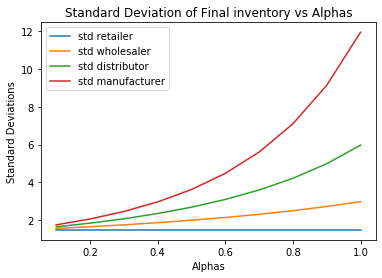

In [139]:
plt.figure(1)
plt.plot(alphas,stds_I_retailer   ,  label="std retailer")
plt.plot(alphas,stds_I_wholesaler ,  label="std wholesaler")
plt.plot(alphas,stds_I_distributor,  label="std distributor")
plt.plot(alphas,stds_I_manufacturer, label="std manufacturer")
plt.xlabel("Alphas")
plt.ylabel("Standard Deviations")
plt.legend()
plt.title("Standard Deviation of Final inventory vs Alphas")




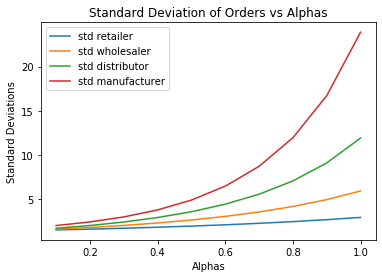

In [119]:
plt.figure(2)
plt.plot(alphas,stds_O_retailer   ,  label="std retailer")
plt.plot(alphas,stds_O_wholesaler ,  label="std wholesaler")
plt.plot(alphas,stds_O_distributor,  label="std distributor")
plt.plot(alphas,stds_O_manufacturer, label="std manufacturer")
plt.xlabel("Alphas")
plt.ylabel("Standard Deviations")
plt.legend()
plt.title("Standard Deviation of Orders vs Alphas")

plt.show()



In [137]:
plt.figure(3)
# plt.plot(retailer.table[1000:2000,ITEM_ORD])
# plt.plot(wholesaler.table[1000:2000,ITEM_ORD])
# plt.plot(distributor.table[1000:2000,ITEM_ORD])
plt.plot(manufacturer.table[1000:2000,ITEM_ORD])
plt.xlabel("Time")
plt.ylabel("Orders")
plt.legend()
plt.title("Orders vs Time")

plt.show()



In [136]:
#final inventory vs time#
plt.figure(4)
#plt.plot(retailer.table[1000:2000,FIN_INV])
#plt.plot(wholesaler.table[1000:2000,FIN_INV])
#plt.plot(distributor.table[1000:2000,FIN_INV])
plt.plot(manufacturer.table[1000:2000,FIN_INV])
plt.xlabel("Time")
plt.ylabel("Final Inventory")
# plt.legend() 
plt.title("Final Inventory vs Time")

plt.show()
    


plt.figure(figsize = (30, 5))



In [127]:
col_string =["I_IN",
"It.REC",
"It.HAn",
"OR.RE", #ORDER RECEIVED
"I.OWE",
"I.SEN",
"F_In",
"It.OR",
"IP",
"FOR"]
#

print("retailer")
df1 = pd.DataFrame(data=(retailer.table[0:time_steps+1,:].astype(int)), index=["t="+str(i) for i in range(time_steps+1)], columns=col_string)
print(df1)

print("wholesaler")
df1 = pd.DataFrame(data=wholesaler.table[0:time_steps+1,:].astype(int), index=["t="+str(i) for i in range(time_steps+1)], columns=col_string)
print(df1)

print("distributor")
df1 = pd.DataFrame(data=distributor.table[0:time_steps+1,:].astype(int), index=["t="+str(i) for i in range(time_steps+1)], columns=col_string)
print(df1)

print("manufacturer")
df1 = pd.DataFrame(data=manufacturer.table[0:time_steps+1,:].astype(int), index=["t="+str(i) for i in range(time_steps+1)], columns=col_string)
print(df1)





Text(0.5, 1.0, 'Standard Deviation of Orders vs Alphas')

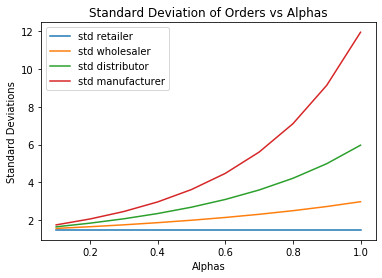

In [128]:
plt.figure(2)
plt.plot(alphas,stds_I_retailer   ,  label="std retailer")
plt.plot(alphas,stds_I_wholesaler ,  label="std wholesaler")
plt.plot(alphas,stds_I_distributor,  label="std distributor")
plt.plot(alphas,stds_I_manufacturer, label="std manufacturer")

plt.xlabel("Alphas")
plt.ylabel("Standard Deviations")
plt.legend()
plt.title("Standard Deviation of Orders vs Alphas")


Text(0.5, 1.0, 'Standard Deviation of Orders vs Alphas')

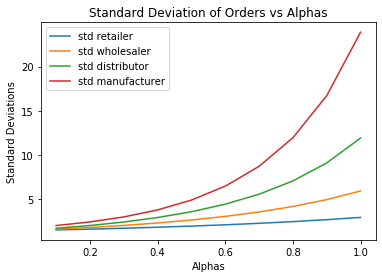

In [129]:
plt.figure(2)
plt.plot(alphas,stds_O_retailer   ,  label="std retailer")
plt.plot(alphas,stds_O_wholesaler ,  label="std wholesaler")
plt.plot(alphas,stds_O_distributor,  label="std distributor")
plt.plot(alphas,stds_O_manufacturer, label="std manufacturer")
plt.xlabel("Alphas")
plt.ylabel("Standard Deviations")
plt.legend()
plt.title("Standard Deviation of Orders vs Alphas")


Text(0.5, 1.0, 'Orders vs Time')

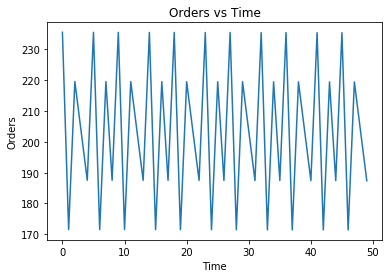

In [131]:
plt.figure(3)
#plt.plot(retailer.table[1000:2000,ITEM_ORD])
#plt.plot(wholesaler.table[1000:1050,ITEM_ORD])
#plt.plot(distributor.table[1000:1050,ITEM_ORD])
plt.plot(manufacturer.table[1000:1050,ITEM_ORD])
plt.xlabel("Time")
plt.ylabel("Orders")
# plt.legend()
plt.title("Orders vs Time")